# Covid-19 Cases Prediction

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

## Datasets

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/country-mapping-iso-continent-region")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tahaa\.cache\kagglehub\datasets\andradaolteanu\country-mapping-iso-continent-region\versions\1


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antgoldbloom/covid19-data-from-john-hopkins-university")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tahaa\.cache\kagglehub\datasets\antgoldbloom\covid19-data-from-john-hopkins-university\versions\931


## Data Preparation

In [6]:
df_confirm = pd.read_csv(r"Datasets/covid19-data-from-john-hopkins-university/versions/931/CONVENIENT_global_confirmed_cases.csv")
df_deaths = pd.read_csv(r"Datasets/covid19-data-from-john-hopkins-university/versions/931/CONVENIENT_global_deaths.csv")

In [7]:
df_confirm

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [8]:
df_deaths

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,3/6/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [9]:
df_world = pd.DataFrame({"Country": [], "Cases": [], "Deaths": []})

df_world["Country"] = df_confirm.iloc[:, 1:].columns

cases = []
for c in df_world["Country"]:
    cases.append(pd.to_numeric(df_confirm[c][1:]).sum())
df_world["Cases"] = cases

deaths = []
for d in df_world["Country"]:
    deaths.append(pd.to_numeric(df_deaths[d][1:]).sum())
df_world["Deaths"] = deaths

df_world

,Country,Cases,Deaths
0,Afghanistan,209451.0,7896.0
1,Albania,334457.0,3598.0
2,Algeria,271496.0,6881.0
3,Andorra,47890.0,165.0
4,Angola,105288.0,1933.0
...,...,...,...
284,West Bank and Gaza,703228.0,5708.0
285,Winter Olympics 2022,535.0,0.0
286,Yemen,11945.0,2159.0
287,Zambia,343135.0,4057.0


In [10]:
countries = []
for country in df_world["Country"]:
    if '.' in country:
        country = country.split('.')[0]
    if '(' in country:
        country = country.split('(')[0]
    if '*' in country:
        country = country.split('*')[0]
    country = country.strip()
    
    countries.append(country)
    
df_world["Country"] = countries

df_world = df_world.groupby("Country").agg({
    "Cases": "sum",
    "Deaths": "sum"
}).reset_index()

df_world.reset_index(drop=True, inplace=True)

df_world    

,Country,Cases,Deaths
0,Afghanistan,209451.0,7896.0
1,Albania,334457.0,3598.0
2,Algeria,271496.0,6881.0
3,Andorra,47890.0,165.0
4,Angola,105288.0,1933.0
...,...,...,...
195,West Bank and Gaza,703228.0,5708.0
196,Winter Olympics 2022,535.0,0.0
197,Yemen,11945.0,2159.0
198,Zambia,343135.0,4057.0


In [11]:
df_daily = pd.DataFrame({"Date":[], "Cases": [], "Deaths": []})

df_daily["Date"] = pd.DataFrame(df_confirm["Country/Region"].iloc[1:])

cases = []
for c in range(1, len(df_confirm)):
    cases.append(sum(pd.to_numeric(df_confirm.iloc[c, 1:])))
df_daily["Cases"] = cases

deaths = []
for d in range(1, len(df_deaths)):
    deaths.append(sum(pd.to_numeric(df_deaths.iloc[d, 1:])))
df_daily["Deaths"] = deaths

df_daily.reset_index(drop=True, inplace=True)
df_daily = df_daily.set_index("Date")

df_daily

,Cases,Deaths
Date,,
1/23/20,100.0,1.0
1/24/20,287.0,8.0
1/25/20,493.0,16.0
1/26/20,683.0,14.0
1/27/20,809.0,26.0
...,...,...
3/5/23,56126.0,148.0
3/6/23,58040.0,366.0
3/7/23,130437.0,923.0


## Data Visuliualization

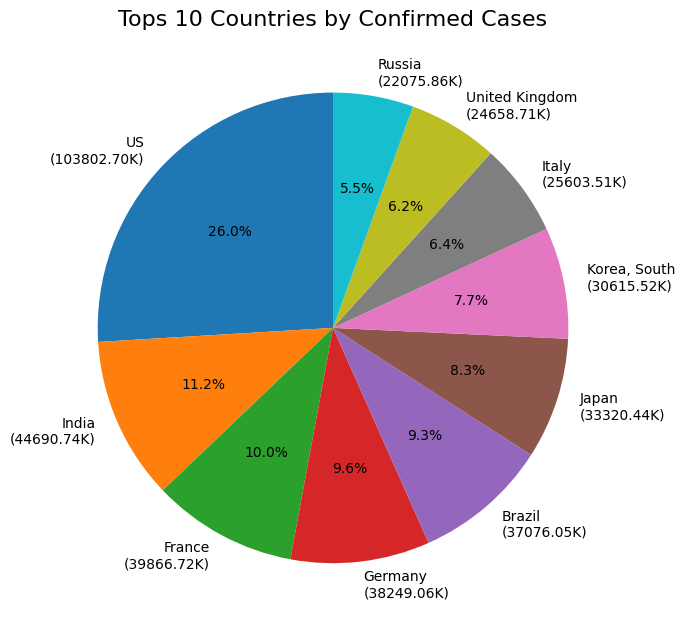

In [12]:
top_cases_countries = df_world.sort_values(by="Cases", ascending=False).head(10)
pie_cases_labels = [f"{Country}\n({Cases/1000:.2f}K)" for Country, Cases in zip(top_cases_countries["Country"], top_cases_countries["Cases"])]

plt.figure(figsize=(7, 7))
plt.pie(top_cases_countries["Cases"],
        labels=pie_cases_labels,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Tops 10 Countries by Confirmed Cases", fontsize=16)
plt.tight_layout()
plt.show()

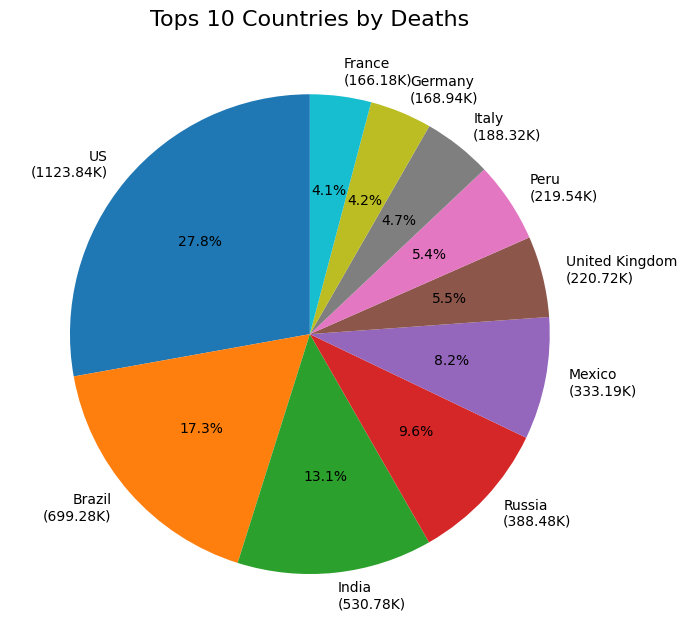

In [13]:
top_deaths_countries = df_world.sort_values(by="Deaths", ascending=False).head(10)
pie_deaths_labels = [f"{Country}\n({Deaths/1000:.2f}K)" for Country, Deaths in zip(top_deaths_countries["Country"], top_deaths_countries["Deaths"])]

plt.figure(figsize=(7, 7))
plt.pie(top_deaths_countries["Deaths"],
       labels=pie_deaths_labels,
       autopct='%1.1f%%',
       startangle=90)
plt.title("Tops 10 Countries by Deaths", fontsize=16)
plt.tight_layout()
plt.show()

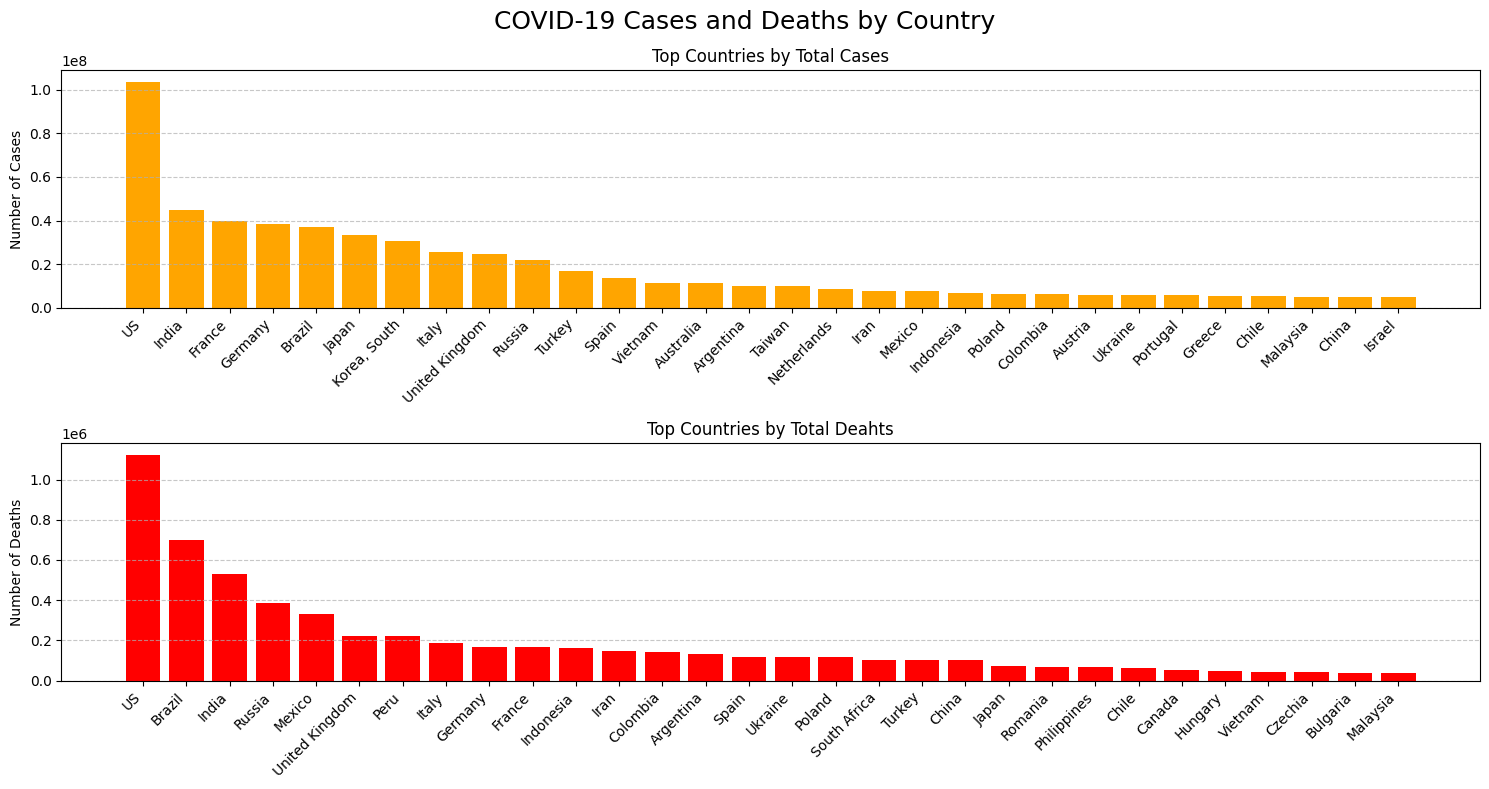

In [14]:
top_cases_countries = df_world.sort_values(by="Cases", ascending=False).head(30)
pie_cases_labels = [f"{Country}\n({Cases/1000:.2f}K)" for Country, Cases in zip(top_cases_countries["Country"], top_cases_countries["Cases"])]

top_deaths_countries = df_world.sort_values(by="Deaths", ascending=False).head(30)
pie_deaths_labels = [f"{Country}\n({Deaths/1000:.2f}K)" for Country, Deaths in zip(top_deaths_countries["Country"], top_deaths_countries["Deaths"])]

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.bar(top_cases_countries["Country"], top_cases_countries["Cases"], color="orange")
plt.title("Top Countries by Total Cases")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.bar(top_deaths_countries["Country"], top_deaths_countries["Deaths"], color="red")
plt.title("Top Countries by Total Deahts")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("COVID-19 Cases and Deaths by Country", fontsize=18)
plt.tight_layout()
plt.show()

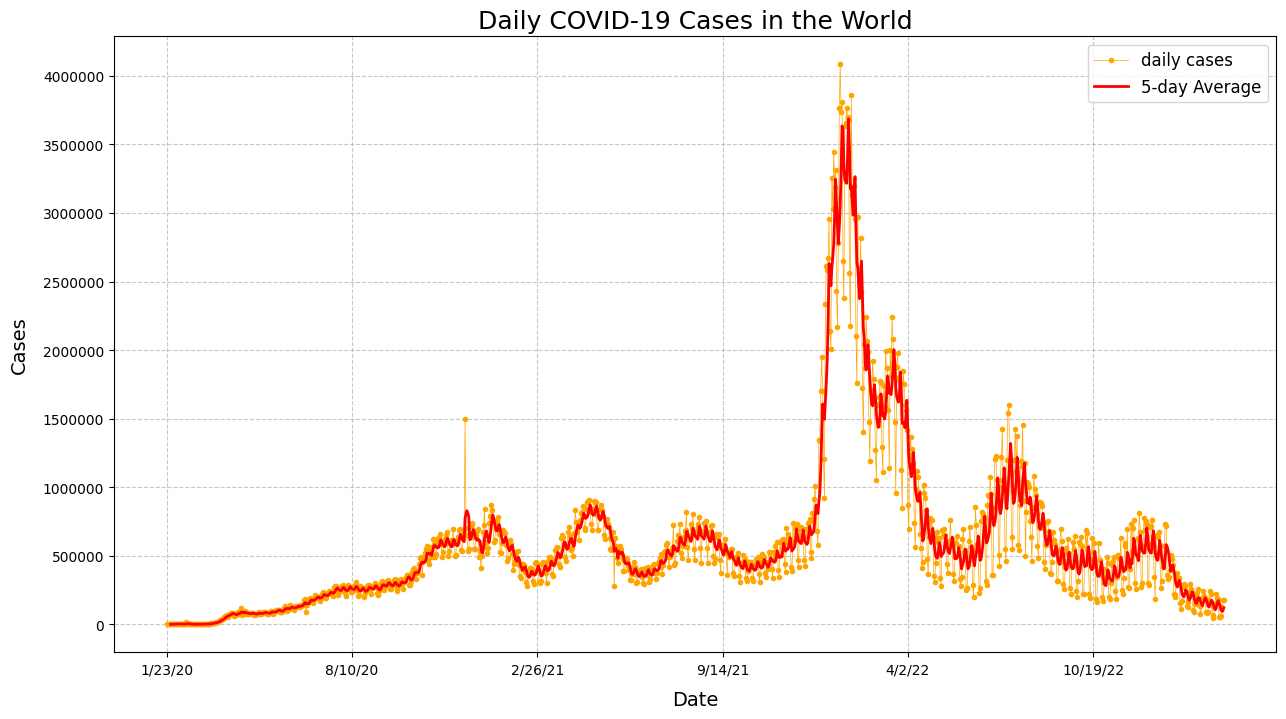

In [15]:
plt.figure(figsize=(15, 8))

df_daily["Cases"].plot(marker=".",
         linewidth=0.5,
         color="orange",
         label="daily cases")

df_daily["Cases"].rolling(window=5).mean().plot(color="red",
         linewidth=2,
         label="5-day Average")

plt.title("Daily COVID-19 Cases in the World", fontsize=18)
plt.ylabel("Cases", fontsize=14, labelpad=10)
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

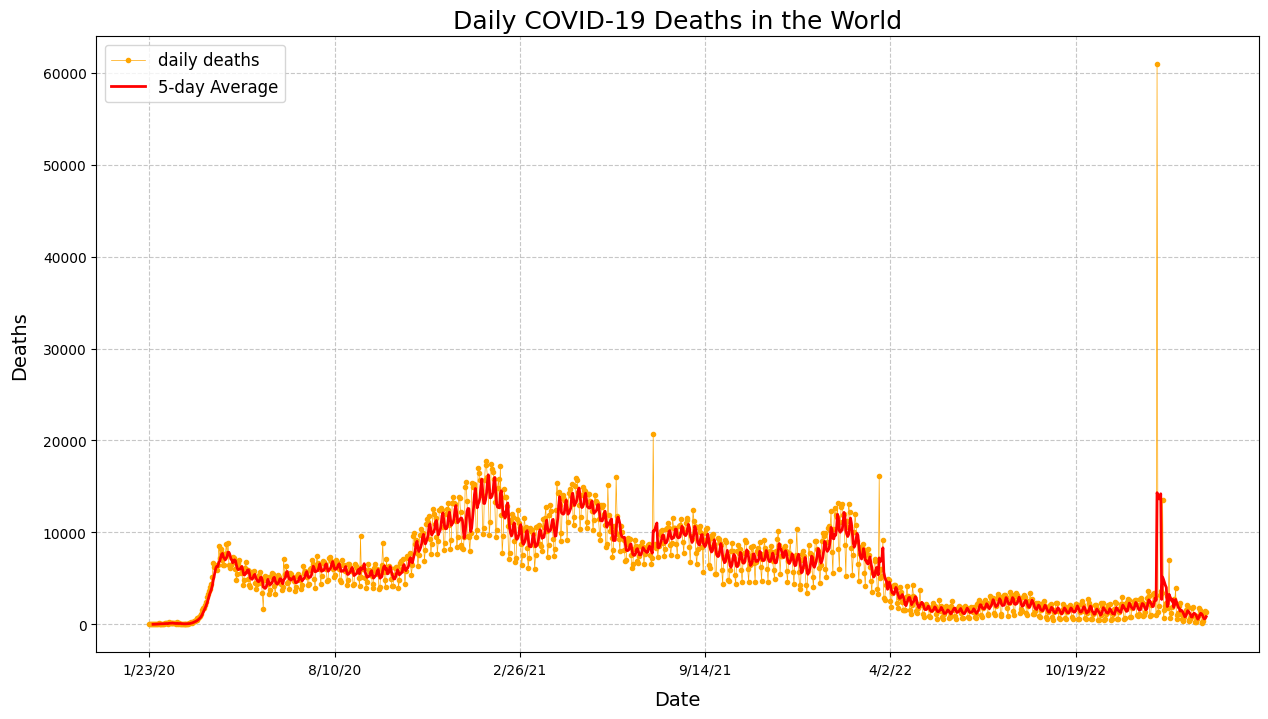

In [16]:
plt.figure(figsize=(15, 8))

df_daily["Deaths"].plot(marker=".",
         linewidth=0.5,
         color="orange",
         label="daily deaths")

df_daily["Deaths"].rolling(window=5).mean().plot(color="red",
         linewidth=2,
         label="5-day Average")

plt.title("Daily COVID-19 Deaths in the World", fontsize=18)
plt.ylabel("Deaths", fontsize=14, labelpad=10)
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Prediction Forecasting

### Cases Forecasting for the Next Year

In [31]:
df_prophet_cases = pd.DataFrame({"ds": [], "y": []})
df_prophet_cases["ds"] = pd.to_datetime(df_daily.index, format='%m/%d/%y')
df_prophet_cases["y"] = df_daily.iloc[:, 0].values

df_prophet_cases.reset_index(drop=True, inplace=True)
df_prophet_cases.head(10)

,ds,y
0,2020-01-23,100.0
1,2020-01-24,287.0
2,2020-01-25,493.0
3,2020-01-26,683.0
4,2020-01-27,809.0
5,2020-01-28,2651.0
6,2020-01-29,589.0
7,2020-01-30,2068.0
8,2020-01-31,1690.0
9,2020-02-01,2111.0


In [35]:
set_log_level('ERROR')

model = NeuralProphet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=False)
model.fit(df_prophet_cases, freq="D")

WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Training: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading `train_dataloader` to estimate number of stepping batches.


Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=227` reached.
Restoring states from the checkpoint path at c:\Users\tahaa\Documents\GitHub\ML-Training-Projects\04-Time-Series-Forecasting\Covid-19-Cases\.lr_find_e5ce74ae-653c-44d4-b907-01695aa7f5d7.ckpt
Restored all states from the checkpoint at c:\Users\tahaa\Documents\GitHub\ML-Training-Projects\04-Time-Series-Forecasting\Covid-19-Cases\.lr_find_e5ce74ae-653c-44d4-b907-01695aa7f5d7.ckpt
Loading `train_dataloader` to estimate number of stepping batches.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=110` reached.


,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.633676,0.0,1.820276e+06,1.974318e+06,0.632742,0.0,0
1,0.459824,0.0,1.416296e+06,1.609400e+06,0.458373,0.0,1
2,0.317081,0.0,1.066815e+06,1.267067e+06,0.316528,0.0,2
3,0.224080,0.0,8.219112e+05,9.958961e+05,0.223972,0.0,3
4,0.180516,0.0,6.882409e+05,8.333948e+05,0.180636,0.0,4
...,...,...,...,...,...,...,...
105,0.032103,0.0,1.891364e+05,3.093323e+05,0.032533,0.0,105
106,0.032072,0.0,1.873231e+05,2.982727e+05,0.031859,0.0,106
107,0.032062,0.0,1.869572e+05,3.027722e+05,0.031852,0.0,107
108,0.032073,0.0,1.884209e+05,3.059311e+05,0.032239,0.0,108


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\data\split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA e

Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\plot_forecast_matplotlib.py:84: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




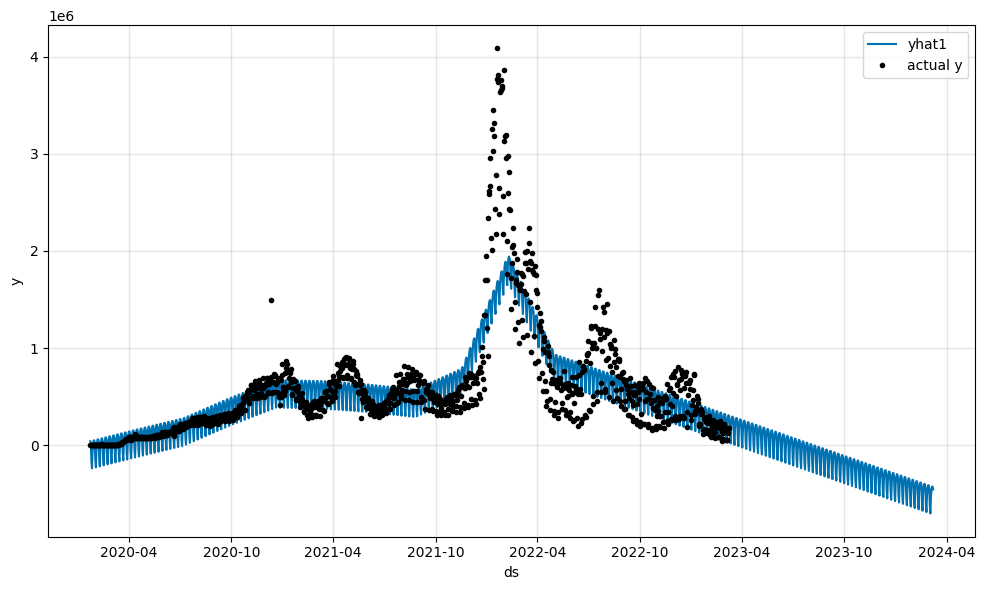

In [36]:
model.set_plotting_backend("matplotlib")

future = model.make_future_dataframe(df_prophet_cases, n_historic_predictions=True, periods=365)
forecast = model.predict(future)

model.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:636: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.




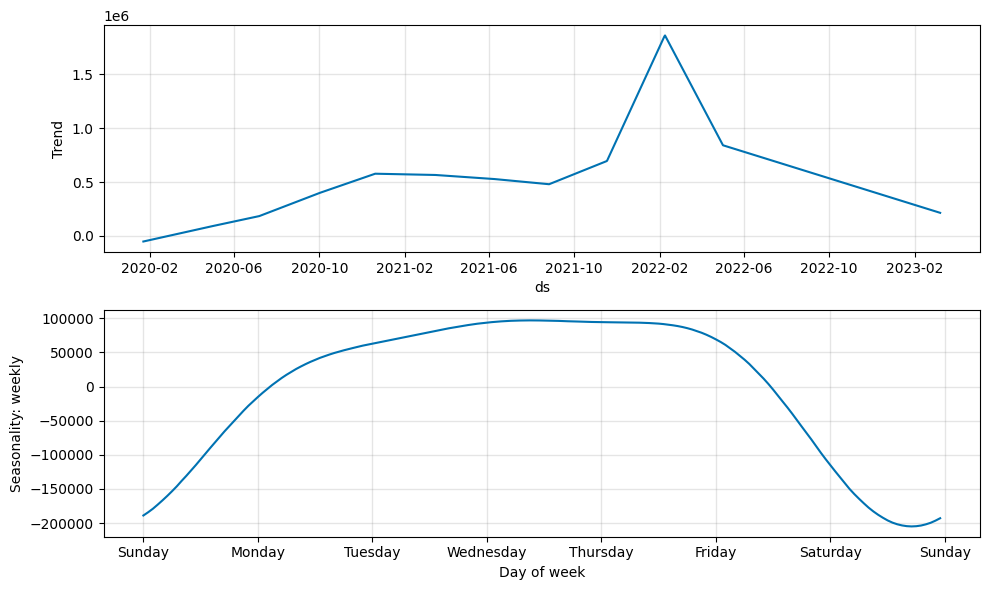

In [37]:
model.plot_parameters(components=["trend", "seasonality"])

### Deaths Forecasting for the Next Year

In [38]:
df_prophet_deaths = pd.DataFrame({"ds": [], "y": []})
df_prophet_deaths["ds"] = pd.to_datetime(df_daily.index, format='%m/%d/%y')
df_prophet_deaths["y"] = df_daily.iloc[:, 1].values

df_prophet_deaths.reset_index(drop=True, inplace=True)
df_prophet_deaths.head(10)

,ds,y
0,2020-01-23,1.0
1,2020-01-24,8.0
2,2020-01-25,16.0
3,2020-01-26,14.0
4,2020-01-27,26.0
5,2020-01-28,49.0
6,2020-01-29,2.0
7,2020-01-30,39.0
8,2020-01-31,42.0
9,2020-02-01,46.0


In [39]:
set_log_level('ERROR')

model = NeuralProphet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=False)
model.fit(df_prophet_deaths, freq="D")

WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Training: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading `train_dataloader` to estimate number of stepping batches.


Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=227` reached.
Restoring states from the checkpoint path at c:\Users\tahaa\Documents\GitHub\ML-Training-Projects\04-Time-Series-Forecasting\Covid-19-Cases\.lr_find_2b4dc34f-d333-4537-95a7-3555e0c5bb50.ckpt
Restored all states from the checkpoint at c:\Users\tahaa\Documents\GitHub\ML-Training-Projects\04-Time-Series-Forecasting\Covid-19-Cases\.lr_find_2b4dc34f-d333-4537-95a7-3555e0c5bb50.ckpt
Loading `train_dataloader` to estimate number of stepping batches.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=110` reached.


,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.888762,0.0,17256.277344,19383.335938,0.887882,0.0,0
1,0.631099,0.0,12903.191406,15189.683594,0.629962,0.0,1
2,0.379996,0.0,8566.098633,11010.465820,0.379190,0.0,2
3,0.199632,0.0,5297.062988,7263.395020,0.198932,0.0,3
4,0.106720,0.0,3560.667480,4525.611816,0.106598,0.0,4
...,...,...,...,...,...,...,...
105,0.018584,0.0,1175.770142,1809.286133,0.018543,0.0,105
106,0.018565,0.0,1173.344971,1793.961792,0.018480,0.0,106
107,0.018561,0.0,1176.290894,1791.424072,0.018568,0.0,107
108,0.018553,0.0,1172.592773,1787.911621,0.018472,0.0,108


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\data\split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA e

Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\plot_forecast_matplotlib.py:84: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




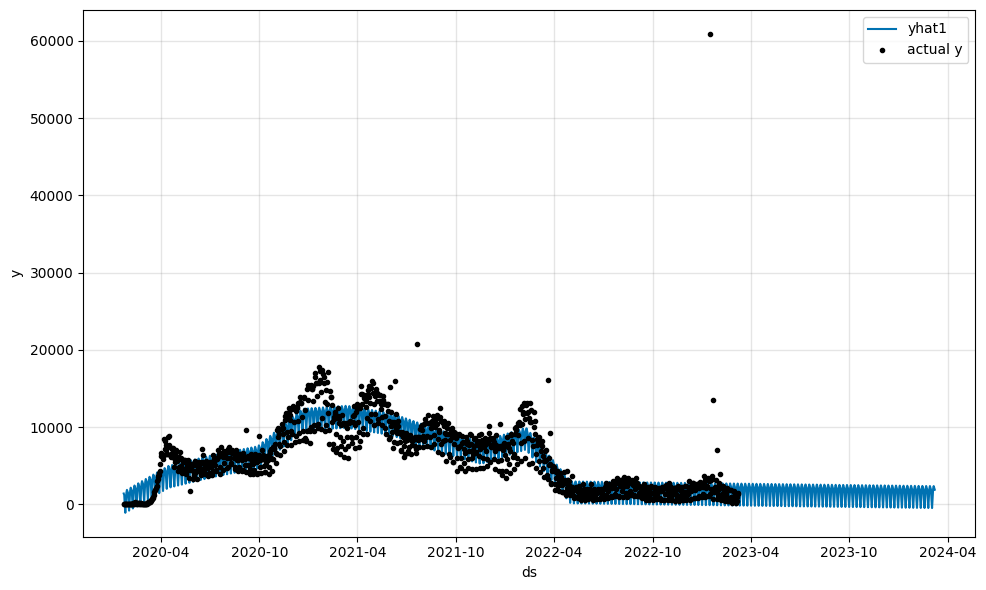

In [40]:
model.set_plotting_backend("matplotlib")

future = model.make_future_dataframe(df_prophet_deaths, n_historic_predictions=True, periods=365)
forecast = model.predict(future)

model.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\tahaa\.conda\envs\torch_env\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:636: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.




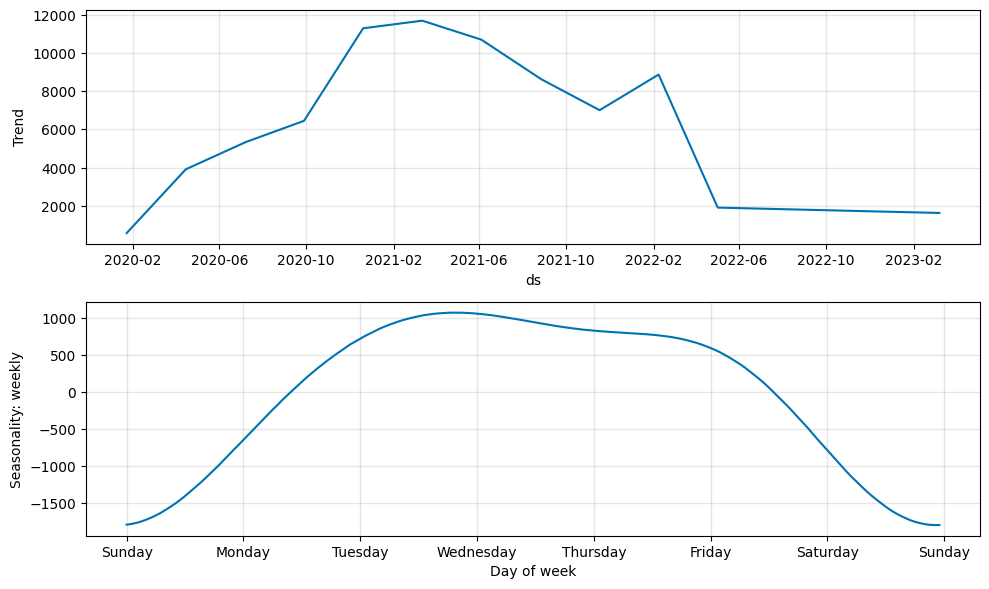

In [41]:
model.plot_parameters(components=["trend", "seasonality"])